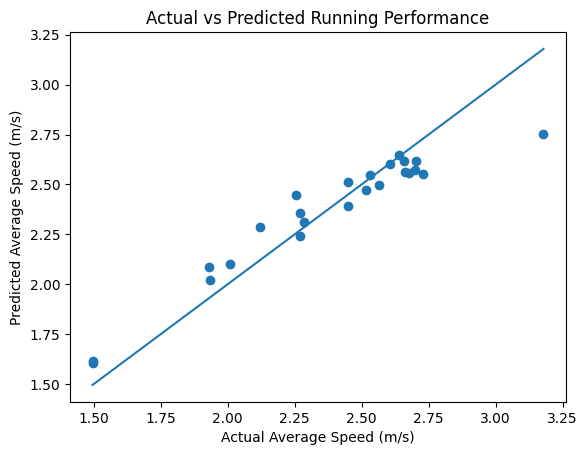

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel("Strava Running Data.xlsx")

# Remove extremely short or unrealistic runs
df = df[df["distance"] > 500]        # meters
df = df[df["moving_time"] > 300]     # seconds


# Feature standardization
df["distance_km"] = df["distance"] / 1000
df["pace_min_per_km"] = (df["moving_time"] / 60) / df["distance_km"]
df["elevation_per_km"] = df["total_elevation_gain"] / df["distance_km"]


features = [
    "distance_km",
    "pace_min_per_km",
    "elevation_per_km",
    "max_speed"
]

X = df[features]
y = df["average_speed"]   # performance target (m/s)

#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Plot 1: Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual Average Speed (m/s)")
plt.ylabel("Predicted Average Speed (m/s)")
plt.title("Actual vs Predicted Running Performance")
plt.show()

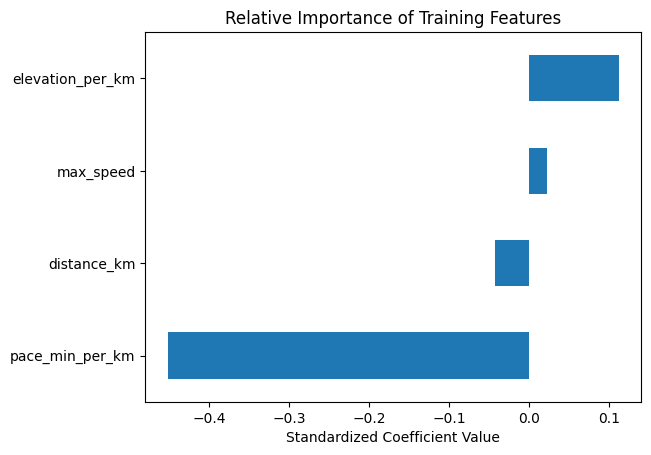

In [8]:
# Plot 2: Feature importance
coefficients = pd.Series(
    pipeline.named_steps["model"].coef_,
    index=features
).sort_values()

plt.figure()
coefficients.plot(kind="barh")
plt.xlabel("Standardized Coefficient Value")
plt.title("Relative Importance of Training Features")
plt.show()


In [9]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.017475061121289052
R² Score: 0.8844207750006545
